# Loan Default Prediction

This project uses **supervised machine learning** to predict loan approval using application details and credit history, focusing on building interpretable classification models for risk assessment.

---

## Objectives

- Perform **Exploratory Data Analysis** to identify patterns
- Engineer features to improve model performance
- Train and compare **classification algorithms**
- Evaluate using **accuracy**, **precision**, **recall**, and **confusion matrix**
- Address this **supervised classification** problem by predicting **categorical outcomes** (Default vs Not Default)
- Use **SHAP** for model interpretability
- Deploy best model for **real-time** or **batch inference**

> **Dataset:** [Kaggle - Abimic](https://www.kaggle.com/datasets/abimic/ai-loan-approval-dataset)

---

## Author

- 🔗 **GitHub**: [@techieemike](https://github.com/techieemike)
- 🔗 **Kaggle**: [@Abimic](https://www.kaggle.com/abimic)
- 🔗 **Linktree**: [linktr.ee/TechieMike](https://linktr.ee/TechieMike)


In [1]:
import sys
print(sys.executable)

C:\Users\ABIMIC\Documents\Study\Projects\Machine Learning\AI Loan Approval Prediction Systems\venv\Scripts\python.exe


In [2]:
#Importing necessary libraries

#General Import
import numpy as np # for numerical computations (arrays, math functions, linear algebra)
import pandas as pd # for data manipulation and analysis (DataFrames, Series, CSV/Excel handling)
import matplotlib.pyplot as plt #for data visualization(charts, plots, graphs)
%matplotlib inline 
#%matplotlib inline Ensures matplotlib plots are displayed directly inside the Jupyter Notebook output cells
import seaborn as sns # used for statistical visualization(heatmap, pairplot, advanced styling)
import warnings # used to manage warning messages
warnings.filterwarnings('ignore') #used to suppress these warning messages
pd.set_option('future.no_silent_downcasting', True) # Ensures pandas does NOT silently change (downcast) data types; 



#Machine Learning import

#Train Test Split
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
# train_test_split: Splits data into training and testing sets
# StratifiedKFold: Ensures balanced class distributions in cross-validation splits
# cross_val_score: Evaluates model performance using cross-validation
# GridSearchCV: Hyperparameter tuning using grid search with cross-validation
#Ths piece of code brings in tools to split data, validate models, and tune hyperparameters for better machine learning performance.


#import SVC(Support Vector Classifier)
from sklearn.svm import SVC


#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Extreme Gradient Boosting Classifier
from xgboost import XGBClassifier

#Calculate Accuracy of predictions
from sklearn.metrics import accuracy_score


#imports tools to prepare data: LabelEncoder converts categorical labels into numbers, and StandardScaler standardizes features (mean = 0, variance = 1) for better model performance.
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For SHAP (SHapley Additive exPlanations) values, used for model interpretability
import shap

# For saving and loading machine learning models
import joblib

#Import Library
import importlib

In [41]:
#Importing the dataset

df_train = pd.read_csv(r'C:\Users\ABIMIC\Documents\Study\Projects\Machine Learning\AI Loan Approval Prediction Systems\Dataset\train.csv')
df_test = pd.read_csv(r'C:\Users\ABIMIC\Documents\Study\Projects\Machine Learning\AI Loan Approval Prediction Systems\Dataset\test.csv')


## Exploratory Data Analysis

In [147]:
# Display the first few rows of the training dataset
print("Training Data Head:")
df_train.head()

Training Data Head:


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [148]:
# Display the first few rows of the test dataset
print("\nTest Data Head:")
df_test.head()


Test Data Head:


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [6]:
#Concise summary for the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Concise summary for the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
#Descriptive Statistics of train dataset
df_train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [9]:
#Descriptive Statistics of train dataset
df_train.describe(include='object')

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422

In [10]:
#Descriptive Statistics of train dataset
df_train.describe(include='all')

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique              NaN                NaN         NaN               NaN   
top                 NaN                NaN         NaN               NaN   
freq                NaN                NaN         NaN               NaN   
mean        5403.459283        1621.245798  146.412162         342.00000   
std         6109.041673        2926.248369   85.587325          65.12041   
min          150.000000           0.000000    9.000000          12.00000   
25%         2877.500000           0.000000  100.000000         360.00000   
50%         3812.500000        1188.500000  128.000000         360.00000   
75%         5795.000000        2297.250000  168.000000         360.00000   
max        81000.000000       41667.000000  700.000000         480.00000   

        Credit_History Property_Area Loan_Status  
count       564.000000           614         614  
unique             NaN             3           2  
top                NaN     Semiurban           Y  
freq               NaN           233         422  
mean          0.842199           NaN         NaN  
std           0.364878           NaN         NaN  
min           0.000000           NaN         NaN  
25%           1.000000           NaN         NaN  
50%           1.000000           NaN         NaN  
75%           1.000000           NaN         NaN  
max           1.000000           NaN         NaN

In [11]:
#Descriptive Statistics of test dataset
df_test.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [12]:
#Descriptive Statistics of test dataset
df_test.describe(include='object')

Loan_ID Gender Married Dependents Education Self_Employed  \
count        367    356     367        357       367           344   
unique       367      2       2          4         2             2   
top     LP001015   Male     Yes          0  Graduate            No   
freq           1    286     233        200       283           307   

       Property_Area  
count            367  
unique             3  
top            Urban  
freq             140

In [13]:
#Descriptive Statistics of test dataset
df_test.describe(include='all')

Loan_ID Gender Married Dependents Education Self_Employed  \
count        367    356     367        357       367           344   
unique       367      2       2          4         2             2   
top     LP001015   Male     Yes          0  Graduate            No   
freq           1    286     233        200       283           307   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        367.000000         367.000000  362.000000        361.000000   
unique              NaN                NaN         NaN               NaN   
top                 NaN                NaN         NaN               NaN   
freq                NaN                NaN         NaN               NaN   
mean        4805.599455        1569.577657  136.132597        342.537396   
std         4910.685399        2334.232099   61.366652         65.156643   
min            0.000000           0.000000   28.000000          6.000000   
25%         2864.000000           0.000000  100.250000        360.000000   
50%         3786.000000        1025.000000  125.000000        360.000000   
75%         5060.000000        2430.500000  158.000000        360.000000   
max        72529.000000       24000.000000  550.000000        480.000000   

        Credit_History Property_Area  
count       338.000000           367  
unique             NaN             3  
top                NaN         Urban  
freq               NaN           140  
mean          0.825444           NaN  
std           0.380150           NaN  
min           0.000000           NaN  
25%           1.000000           NaN  
50%           1.000000           NaN  
75%           1.000000           NaN  
max           1.000000           NaN

In [149]:
#Train and test Data Columns

# Data columns
print("Train columns:", df_train.columns)
print("Test columns:", df_test.columns)


Train columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Test columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


##### The training loan dataset consists of 12 independent variables and one target variable, Loan_Status, which is used to train the model.


##### The test loan dataset contains the same 12 independent variables; however, the target variable has been removed and is not available in the test data which is where prediction would be done.

In [150]:
# Dataset shape
df_train.shape, df_test.shape

((614, 13), (367, 12))

In [16]:
#Check if columns in the train dataset equal test dataset
 
df_train.columns.equals(df_test.columns)

False

In [17]:
#Columns in train_data but not in df_test

set(df_train.columns) - set(df_test.columns)

{'Loan_Status'}

In [18]:
# Columns in df_test but not in train_data

set(df_test.columns) - set(df_train.columns)

set()

In [19]:
#print the list of columns in train and test data
print("Train Dataset Columns:")
print(list(df_train.columns))

print("\nTest Dataset Columns:")
print(list(df_test.columns))


Train Dataset Columns:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Test Dataset Columns:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


The description of each variable is provided below.

| Variable           | Description                                  |
|--------------------|----------------------------------------------|
| Loan_ID            | Unique Loan ID                               |
| Gender             | Male/ Female                                 |
| Married            | Applicant married (Y/N)                      |
| Dependents         | Number of dependents                         |
| Education          | Applicant Education (Graduate/Under Graduate)|
| Self_Employed      | Self employed (Y/N)                          |
| ApplicantIncome    | Applicant income                             |
| CoapplicantIncome  | Coapplicant income                           |
| LoanAmount         | Loan amount in thousands                     |
| Loan_Amount_Term   | Term of loan in months                       |
| Credit_History     | Creof individual’s repayment of their debts guidelines              |
| Property_Area      | Urban/ Semi Urban/ Rural                     |
| Loan_Status        | Loan approved (Y/N)                          |


In [62]:
#Null count in each columns of train dataset
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
# Null count in each columns of train dataset in descending order
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
Loan_ID               0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
#% of the missing values in the train data in descending order
missing_Percent=(df_train.isnull().sum()/len(df_train)) *100
missing_Percent = missing_Percent.round(2)
missing_Percent.sort_values(ascending=False)

Credit_History       8.14
Self_Employed        5.21
LoanAmount           3.58
Dependents           2.44
Loan_Amount_Term     2.28
Gender               2.12
Married              0.49
Education            0.00
Loan_ID              0.00
CoapplicantIncome    0.00
ApplicantIncome      0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [23]:
#Return only columns with missing values
df_train.isnull().sum()[df_train.isnull().sum()>0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

### ydata-profiling

In [25]:
!pip install ydata-profiling


[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from ydata_profiling import ProfileReport

report = ProfileReport(df_train, title="Quality_Test", explorative=True)
report.to_file("Data_results.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
!pip install ipywidgets -q


[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from ydata_profiling import ProfileReport
from IPython.display import display

# Generate the report
report = ProfileReport(df_train, title="Quality_Test", explorative=True)

# Display inside Jupyter
display(report)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 41.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

In [26]:
import visualization
importlib.reload(visualization)

<module 'visualization' from 'C:\\Users\\ABIMIC\\Documents\\Study\\Projects\\Machine Learning\\AI Loan Approval Prediction Systems\\src\\visualization.py'>

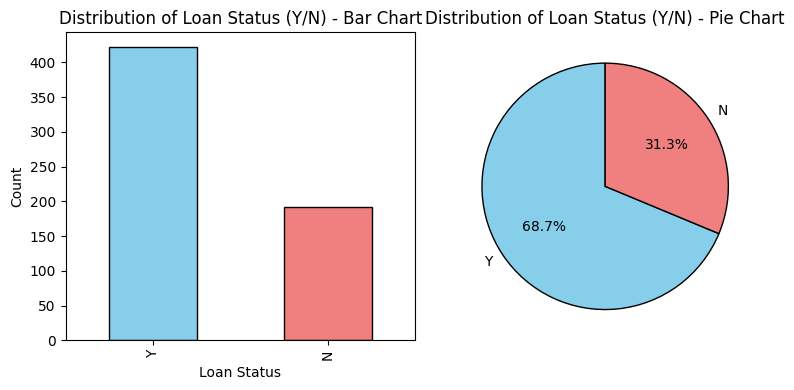

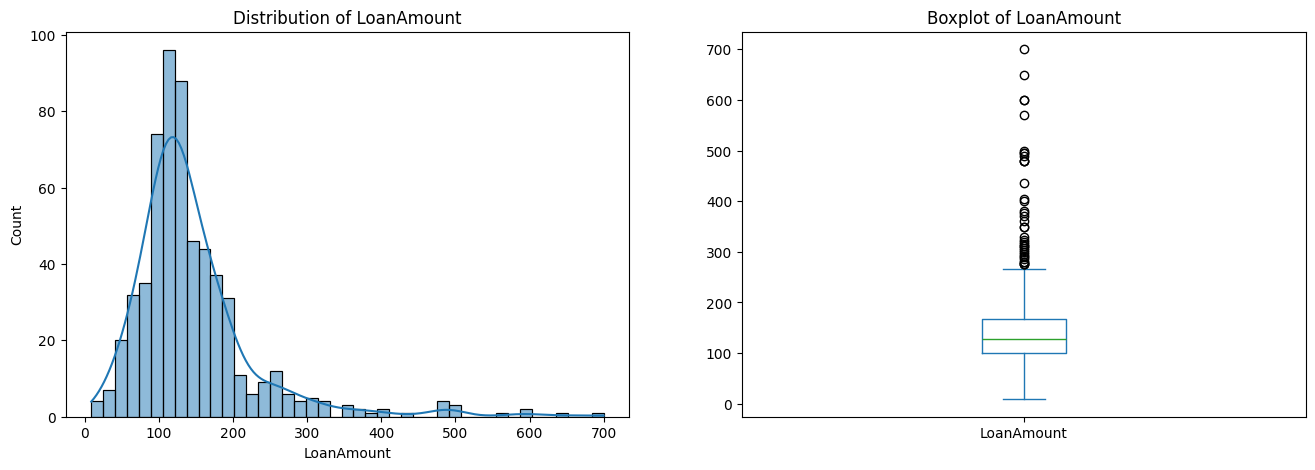

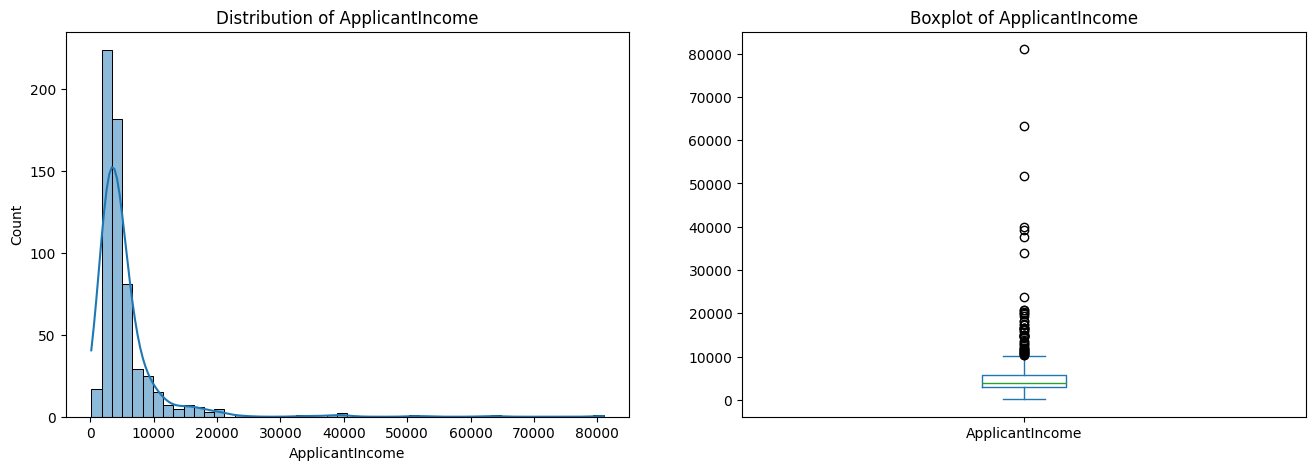

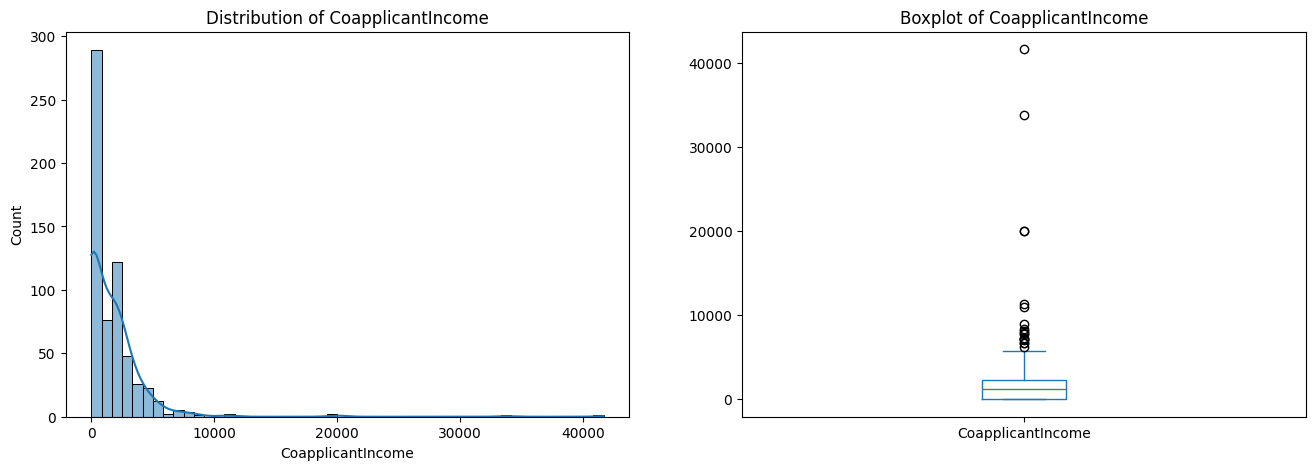

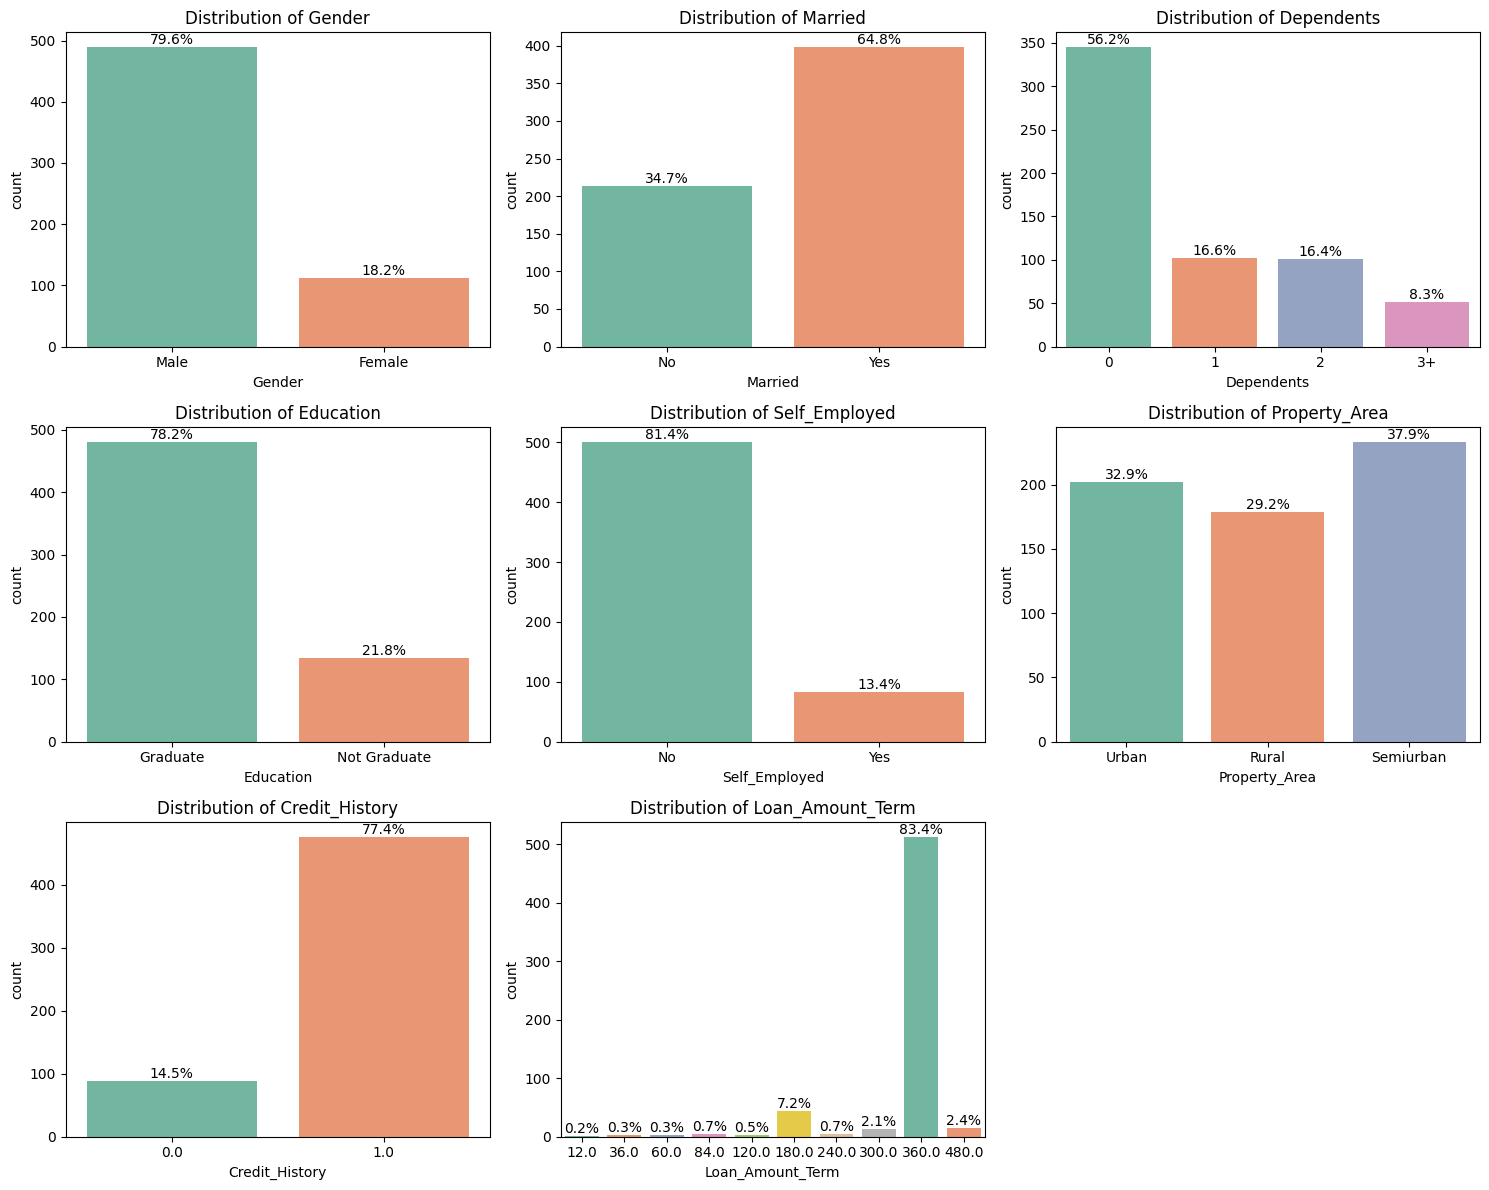

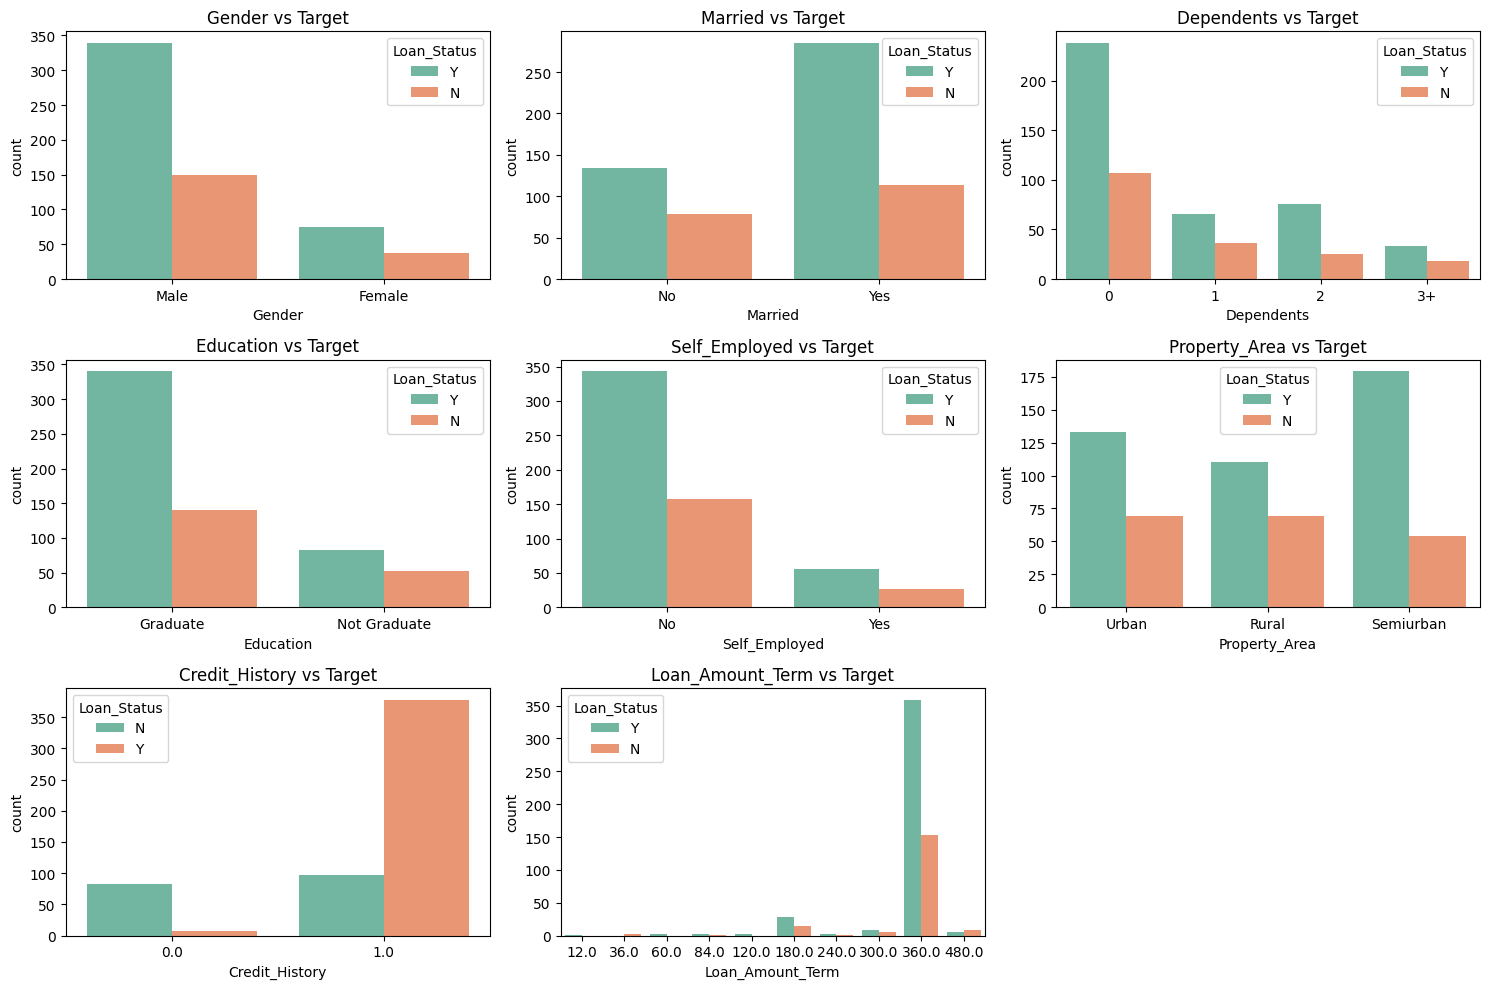

In [27]:
visualization.visualization(df_train)

## Notables from the plot and EDA

- We can see from above plot, and in the summary statisitcs that the mean is greater than the median, hence the distribution in the LoanAmount is rightly skewed

- That more people with credit history of 1 got their loan approved

- ApplicantIncome is rightly skewed

- CoapplicantIncome is rightly skewed

- More people got their loan approved

- Loan Amount is rightly skewed

- More Married People got their loan approved

- More Male got their loan approved

- More Graduate got their loan approved


## Data Cleaning

In [42]:
import fillmissingvalue
importlib.reload(fillmissingvalue)

<module 'fillmissingvalue' from 'C:\\Users\\ABIMIC\\Documents\\Study\\Projects\\Machine Learning\\AI Loan Approval Prediction Systems\\src\\fillmissingvalue.py'>

In [43]:
fillmissingvalue.clean_data(df_train)

In [44]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
fillmissingvalue.clean_data(df_test)

In [46]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

No. of People(Gender) who took loan
Gender
Male      502
Female    112
Name: count, dtype: int64


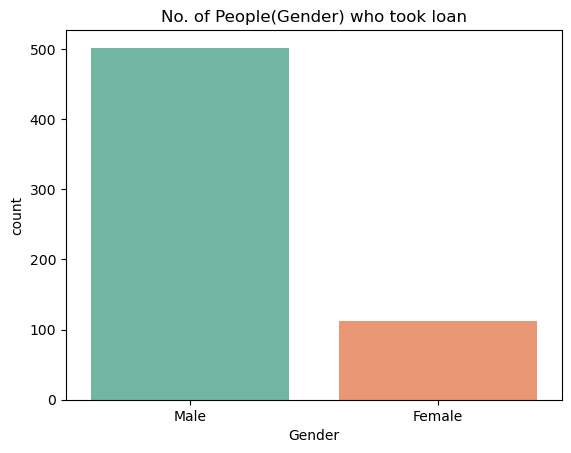

In [41]:
#Number of people(Gender) who took loan - visual
print("No. of People(Gender) who took loan")
print(df_train['Gender'].value_counts())

sns.countplot(data=df_train,x='Gender',palette='Set2')
plt.title("No. of People(Gender) who took loan")
plt.show()

Number of people who took loan by Marital Status
Married
Yes    401
No     213
Name: count, dtype: int64


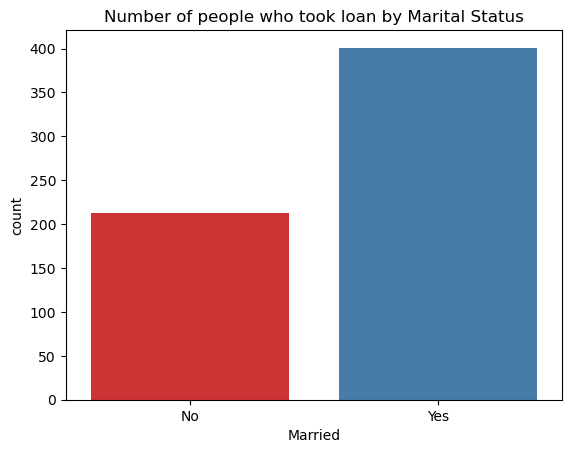

In [43]:
print('Number of people who took loan by Marital Status')
print(df_train['Married'].value_counts())
sns.countplot(x='Married',data = df_train, palette='Set1')
plt.title('Number of people who took loan by Marital Status')
plt.show()

Number of people who took loan based on Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


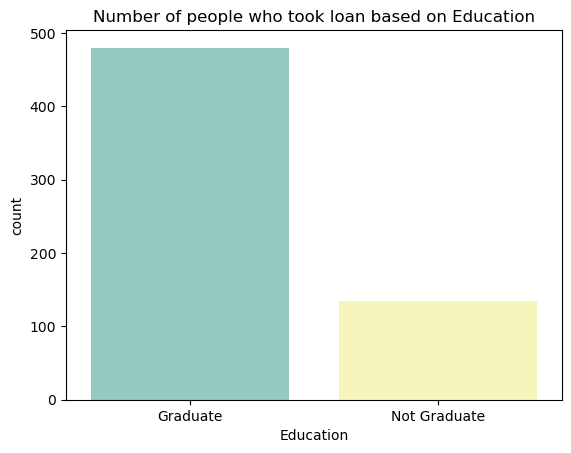

In [45]:
print('Number of people who took loan based on Education')
print(df_train['Education'].value_counts())
sns.countplot(x='Education',data = df_train, palette='Set3')
plt.title('Number of people who took loan based on Education')
plt.show()

### Correlation

In [51]:
corr = df_train.select_dtypes(include='number').corr()
corr

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565181   
CoapplicantIncome        -0.116605           1.000000    0.189218   
LoanAmount                0.565181           0.189218    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036960   
Credit_History           -0.018615           0.011134   -0.000607   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.046531       -0.018615  
CoapplicantIncome         -0.059383        0.011134  
LoanAmount                 0.036960       -0.000607  
Loan_Amount_Term           1.000000       -0.004705  
Credit_History            -0.004705        1.000000

In [156]:
# 1. Convert Target to Numeric (if it isn't already)
df_train['Loan_Status_Num'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})

# 2. Calculate correlation with the target only
target_corr = df_train.corr(numeric_only=True)['Loan_Status_Num'].sort_values(ascending=False)

print(target_corr)

Loan_Status_Num      1.000000
Credit_History       0.540556
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Name: Loan_Status_Num, dtype: float64


### KDE or Displot

### BoxPlot

In [47]:
#create a copy of the no_null dataframe of the train and test data
df_train_nonull=df_train.copy()
df_test_nonull=df_test.copy()

In [88]:
df_train=df_train_nonull.copy()
df_test=df_test_nonull.copy()

### Feature Engineering

In [89]:
import featureengineering
importlib.reload(featureengineering)
from featureengineering import process_loan_data

df_train = process_loan_data(df_train)
df_test = process_loan_data(df_test)

In [90]:
#print the list of columns in train and test data
print("Train Dataset Columns:")
print(list(df_train.columns))

print("\nTest Dataset Columns:")
print(list(df_test.columns))


Train Dataset Columns:
['Dependents', 'Credit_History', 'Loan_Status', 'Loan_to_Income_Ratio', 'Monthly_Installment', 'Log_ApplicantIncome', 'Log_LoanAmount', 'Log_Total_Income', 'Log_Loan_to_Income', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Amount_Bin_Medium', 'Loan_Amount_Bin_High']

Test Dataset Columns:
['Dependents', 'Credit_History', 'Loan_to_Income_Ratio', 'Monthly_Installment', 'Log_ApplicantIncome', 'Log_LoanAmount', 'Log_Total_Income', 'Log_Loan_to_Income', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Amount_Bin_Medium', 'Loan_Amount_Bin_High']


In [91]:
#Columns in train_data but not in df_test

set(df_train.columns) - set(df_test.columns)

{'Loan_Status'}

In [92]:
#Columns in train_data but not in test_data

set(df_test.columns) - set(df_train.columns)

set()

In [93]:
#see train data datatypes
df_train.dtypes

Dependents                  object
Credit_History             float64
Loan_Status                  int64
Loan_to_Income_Ratio       float64
Monthly_Installment        float64
Log_ApplicantIncome        float64
Log_LoanAmount             float64
Log_Total_Income           float64
Log_Loan_to_Income         float64
Gender_Male                  int64
Married_Yes                  int64
Education_Not Graduate       int64
Self_Employed_Yes            int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
Loan_Amount_Bin_Medium       int64
Loan_Amount_Bin_High         int64
dtype: object

In [60]:
df_train.head()

Credit_History  Loan_Status  Log_ApplicantIncome  Log_LoanAmount  \
0             1.0            1             8.674197        4.859812   
1             1.0            0             8.430327        4.859812   
2             1.0            1             8.006701        4.204693   
3             1.0            1             7.857094        4.795791   
4             1.0            1             8.699681        4.955827   

   Log_Total_Income  Log_CoapplicantIncome  Log_Loan_to_Income  \
0          8.674197               0.000000            0.021648   
1          8.714732               7.319202            0.020797   
2          8.006701               0.000000            0.021761   
3          8.505525               7.765993            0.023996   
4          8.699681               0.000000            0.023228   

   Log_Income_Per_Capita  Log_Installment_to_Income  Gender_Male  Married_Yes  \
0               8.674197                   0.000061            1            0   
1               8.021749                   0.000058            1            1   
2               8.006701                   0.000061            1            1   
3               8.505525                   0.000067            1            1   
4               8.699681                   0.000065            1            0   

   Dependents_1  Dependents_2  Dependents_3+  Education_Not Graduate  \
0             0             0              0                       0   
1             1             0              0                       0   
2             0             0              0                       0   
3             0             0              0                       1   
4             0             0              0                       0   

   Self_Employed_Yes  Property_Area_Semiurban  Property_Area_Urban  
0                  0                        0                    1  
1                  0                        0                    0  
2                  1                        0                    1  
3                  0                        0                    1  
4                  0                        0                    1

## Machine Learning

In [94]:
#create a copy of the data with feature engineering applied
df_train_feature=df_train.copy()
df_test_feature=df_test.copy()

In [104]:
df_train=df_train_feature.copy()
df_test=df_test_feature.copy()

In [107]:
import model
importlib.reload(model)

<module 'model' from 'C:\\Users\\ABIMIC\\Documents\\Study\\Projects\\Machine Learning\\AI Loan Approval Prediction Systems\\src\\model.py'>

In [108]:
import model as md

# 1. Prepare data
X_train_bal, y_train_bal = md.handle_imbalance(X_train, y_train)

# 2. Train the Stacked Model
final_stack = md.run_stacked_model(X_train_bal, X_test, y_train_bal, y_test)

# 3. Find the 'Magic Number' (Threshold) to hit 80%
best_threshold = md.optimize_threshold(final_stack, X_test, y_test)


--- THRESHOLD OPTIMIZATION ---
Optimal Threshold: 0.31
Max Accuracy at this Threshold: 78.86%

Detailed Report at Optimal Threshold:
              precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.78      0.95      0.85        80

    accuracy                           0.79       123
   macro avg       0.81      0.72      0.74       123
weighted avg       0.80      0.79      0.77       123



In [103]:
import model as md

# 1. Prepare data
X_train_bal, y_train_bal = md.handle_imbalance(X_train, y_train)

# 2. Run the Stacked Model
final_model = md.run_stacked_model(X_train_bal, X_test, y_train_bal, y_test)


--- STACKED MODEL REPORT ---
Accuracy: 74.80%
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        43
           1       0.78      0.85      0.81        80

    accuracy                           0.75       123
   macro avg       0.72      0.70      0.71       123
weighted avg       0.74      0.75      0.74       123



## SHAP

In [116]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  0%|          | 0/20 [00:00<?, ?it/s]

Type of shap_values: <class 'numpy.ndarray'>
Using 3D slice. Shape: (20, 19)
Generating SHAP Summary Plot...


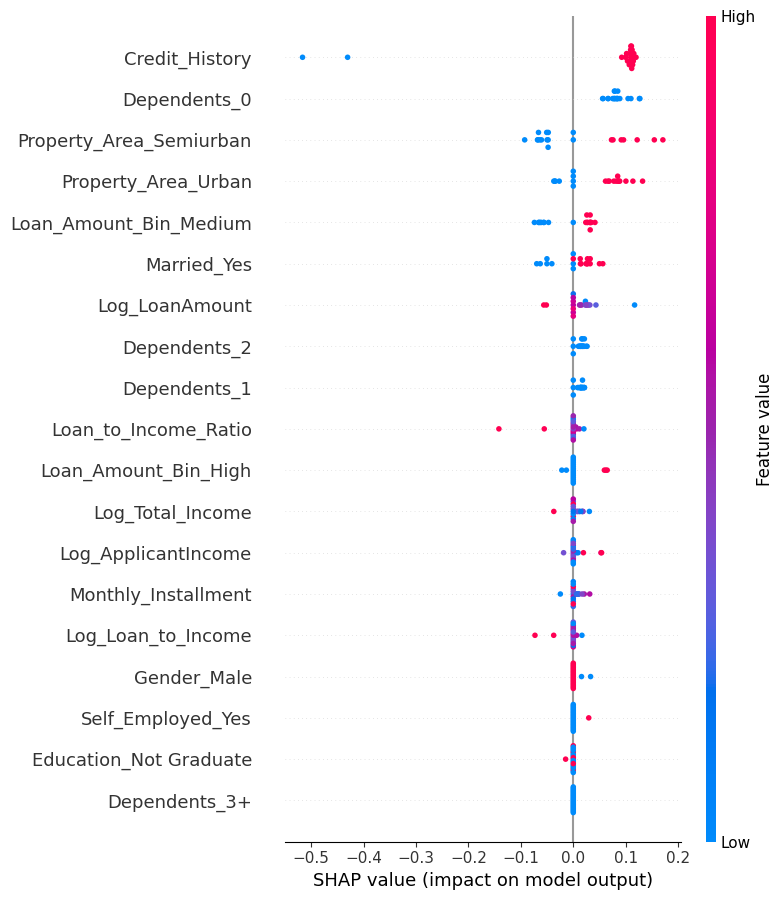

In [120]:
import shap
import numpy as np

# 1. Cast to float to avoid the previous 'isfinite' error
background_data = X_train_bal.iloc[:50].astype(float).values
test_samples = X_final_test.iloc[:20].astype(float).values # Smaller set to be safe/fast

# 2. Re-run Explainer
explainer = shap.KernelExplainer(final_model.predict_proba, background_data)
shap_values = explainer.shap_values(test_samples)

# --- DEBUGGING SHAPES ---
print(f"Type of shap_values: {type(shap_values)}")

# Handle the common shape mismatch
if isinstance(shap_values, list):
    # If it's a list, we want index 1 (Approved class)
    to_plot = shap_values[1]
    print(f"Using list index 1. Shape: {to_plot.shape}")
elif len(shap_values.shape) == 3:
    # If it's a 3D array [samples, features, classes], take class 1
    to_plot = shap_values[:, :, 1]
    print(f"Using 3D slice. Shape: {to_plot.shape}")
else:
    # It's already 2D
    to_plot = shap_values
    print(f"Using raw values. Shape: {to_plot.shape}")

# 3. Final Plotting
print("Generating SHAP Summary Plot...")
# Ensure test_samples matches the shape of to_plot
shap.summary_plot(to_plot, test_samples, feature_names=X_final_test.columns)

In [121]:
!pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/275.7 kB 330.3 kB/s eta 0:00:01
     -- ---------------------------------- 20.5/275.7 kB 330.3 kB/s eta 0:00:01
     -- ---------------------------------- 20.5/275.7 kB 330.3 kB/s eta 0:00:01
     ------------- ---------------------- 102.4/275.7 kB 535.8 kB/s eta 0:00:01
     ------------- ---------------------- 102.4/275.7 kB 535.8 kB/s eta 0:00:01
     -------------------- --------------- 153.6/275.7 kB 510.2 kB/s eta 0:00:01
     ------------------------ ----------- 184.3/275.7 kB 619.5 kB/s eta 0:00:01
     ------------------------ ----------- 184.3/275.7 kB 619.5 kB/s eta 0:00:01
     ---------------------------------- - 266.2/275.7 kB 656.4 kB/s eta 0:00:01
     ---------------------------------- - 266.2/275.7 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 567.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Inst


[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
from lime import lime_tabular

# 1. Create the Explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_bal),
    feature_names=X_train_bal.columns.tolist(),
    class_names=['Rejected', 'Approved'],
    mode='classification'
)

# 2. Explain a single prediction (e.g., the first person in the test set)
idx = 0 
exp = lime_explainer.explain_instance(
    X_final_test.values[idx], 
    model.predict_proba, 
    num_features=5
)

# 3. Show the explanation
from IPython.display import display, HTML

# 3. Show the explanation manually to avoid the ImportError
# We get the explanation as HTML and then use the updated IPython display
html_data = exp.as_html()
display(HTML(html_data))

In [111]:
import joblib
import os

# Define the absolute path
save_path = r'C:\Users\ABIMIC\Documents\Study\Projects\Machine Learning\AI Loan Approval Prediction Systems\model\loan_model_stacked.pkl'

# Ensure the directory exists (just in case)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the model
# NOTE: Use 'final_stack' because that is the name of your variable from the previous step
joblib.dump(final_model, save_path)

print(f"Model saved successfully at: {save_path}")

Model saved successfully at: C:\Users\ABIMIC\Documents\Study\Projects\Machine Learning\AI Loan Approval Prediction Systems\model\loan_model_stacked.pkl


In [115]:
import pandas as pd
import joblib

# 1. Load the saved model (using the path where you saved it)
model_path = r'C:\Users\ABIMIC\Documents\Study\Projects\Machine Learning\AI Loan Approval Prediction Systems\model\loan_model_stacked.pkl'
model = joblib.load(model_path)

# 2. Match Columns (Crucial Step)
# Your model was trained on X_train. Ensure X_final_test has the exact same columns.
# We'll use the feature names the model expects.
model_features = model.feature_names_in_
X_final_test = df_test.reindex(columns=model_features, fill_value=0)

# 3. Get Probabilities
# We use the 'Approved' class probability (column index 1)
final_probs = model.predict_proba(X_final_test)[:, 1]

# 4. Apply your 'Magic' Threshold (0.31)
# This is what unlocked your 78.86% accuracy!
final_predictions = (final_probs >= 0.31).astype(int)

# 5. Prepare the Final Submission DataFrame
# Assuming the original 'test_df' (before engineering) is where Loan_ID is
# If you kept Loan_ID in your df_test, use that.
submission = pd.DataFrame({
    'Loan_ID': df_test_nonull['Loan_ID'], # Use the raw ID from the original file
    'Loan_Status': ["Y" if p == 1 else "N" for p in final_predictions]
})

# 6. Save to CSV
submission.to_csv('final_loan_predictions_submission.csv', index=False)

print("Success! Final predictions saved.")
print(f"Approval Rate: {submission['Loan_Status'].value_counts(normalize=True)['Y']:.2%}")

Success! Final predictions saved.
Approval Rate: 84.47%
